In [97]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [98]:
Co60=pd.read_table("./data/NaI_60Co_600s.dat",sep="\s+")
Cs137=pd.read_table("./data/NaI_137Cs_600s.dat",sep="\s+")
Na22=pd.read_table("./data/NaI_22Na_600s.dat",sep="\s+")
Fondo_600s=pd.read_table("./data/NaI_Fondo_600s.dat",sep="\s+")
Co57=pd.read_table("./data/NaI_57Co_300s.dat",sep="\s+")
Fondo_300s=pd.read_table("./data/NaI_Fondo_300s.dat",sep="\s+")
Fondo6y=Fondo_600s.cuentas
Fondo3y=Fondo_300s.cuentas
Canales=Fondo_600s.canal
Co60y=Co60.cuentas-Fondo6y
Cs137y=Cs137.cuentas-Fondo6y
Na22y=Na22.cuentas-Fondo6y
Co57y=Co57.cuentas-Fondo3y



In [99]:
def gaussiana(x,M1,mu1,sigma1):
    return M1*np.exp(-0.5*((mu1-x)/(sigma1))**2)
def fondo(x,b0,b1,mu):
    return b0+b1*(mu-x)

def gaussiana_experimental(x,M,mu,sigma,b0,b1):
    return fondo(x,b0,b1,mu)+gaussiana(x,M,mu,sigma)

def gaussiana_doble(x,M1,M2,mu1,mu2,sigma1,sigma2,b0,b1):
    return fondo(x,b0,b1,mu1)+gaussiana(x,M1,mu1,sigma1)+gaussiana(x,M2,mu2,sigma2)

In [100]:
def ajustar_gaussiana(Canales,n,x1,x2,y,M1,mu1,sigma1,b0,b1,M2=1,mu2=1,sigma2=1):
    if n==1:
        fit=curve_fit(gaussiana_experimental,Canales[x1:x2],y[x1:x2],p0=[M1,mu1,sigma1,b0,b1])
        args=fit[0]
        errorargs=np.sqrt(np.diag(fit[1]))
        print(f"M1={args[0]:.2f}, mu1={args[1]:.2f}, sigma1={args[2]:.2f}, bo={args[3]:.2f},b1={args[4]:.2f}")
        print(f"Errores={errorargs}")
        return args,errorargs
    elif n==2:
        fit=curve_fit(gaussiana_doble,Canales[x1:x2],y[x1:x2],p0=[M1,M2,mu1,mu2,sigma1,sigma2,b0,b1])
        args=fit[0]
        errorargs=np.sqrt(np.diag(fit[1]))
        print(f"M1={args[0]:.2f}, M2={args[1]:.2f}, mu1={args[2]:.2f}, mu2={args[3]:.2f}, sigma1={args[4]:.2f}, sigma2={args[5]:.2f}, bo={args[6]:.2f},b1={args[7]:.2f}")
        print(f"Errores={errorargs}")
        return args,errorargs




Co60

M1=1278.27, M2=1110.31, mu1=384.68, mu2=432.98, sigma1=8.84, sigma2=9.45, bo=170.85,b1=1.87
Errores=[9.53283791 9.56465664 0.07313266 0.08752222 0.08071963 0.10514622
 3.92974387 0.06778923]


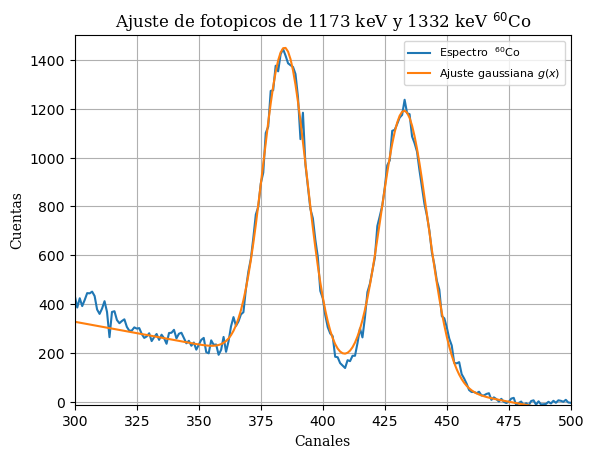

In [101]:
a,b=ajustar_gaussiana(Canales,2,325,475,Co60y,1200,380,20,200,-0.6,1000,430,20)
fig,ax=plt.subplots()

ax.plot(Canales,Co60y,label=r"Espectro  $^{60}$Co")
ax.plot(gaussiana_doble(Canales,*a),label=r"Ajuste gaussiana $g(x)$")



ax.set_xlim(300,500)
ax.set_ylim(-10,1500)

ax.set_xlabel("Canales",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.set_title(r"Ajuste de fotopicos de 1173 keV y 1332 keV $^{60}$Co",family="serif")
ax.grid()
ax.legend(fontsize=8)


plt.show()


Cs137

M1=10010.93, mu1=21.08, sigma1=1.17, bo=983.87,b1=-18.11
Errores=[1.81244642e+02 2.38992339e-02 2.61933815e-02 7.16980545e+01
 1.26727252e+01]


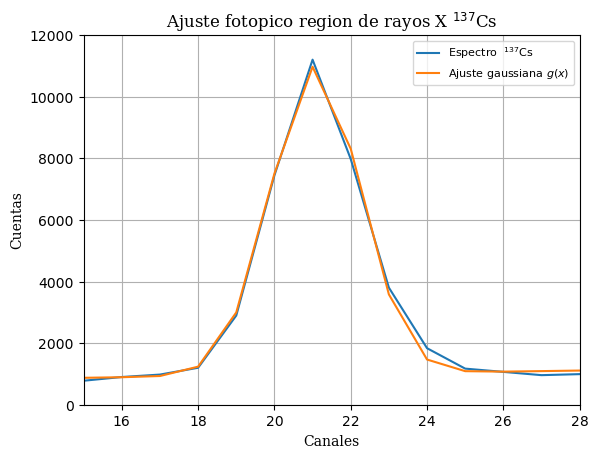

In [102]:
a,b=ajustar_gaussiana(Canales,1,15,30,Cs137y,10000,22,2,1000,0.08)
fig,ax=plt.subplots()

ax.plot(Canales,Cs137y,label=r"Espectro  $^{137}$Cs")
ax.plot(gaussiana_experimental(Canales,*a),label=r"Ajuste gaussiana $g(x)$")

ax.set_xlim(15,28)
ax.set_ylim(0,12000)

ax.set_xlabel("Canales",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.set_title(r"Ajuste fotopico region de rayos X $^{137}$Cs",family="serif")
ax.grid()
ax.legend(fontsize=8)

plt.show()

M1=10685.23, mu1=228.08, sigma1=6.85, bo=86.10,b1=2.57
Errores=[2.36833365e+01 1.72369254e-02 1.85576085e-02 8.20928464e+00
 2.29642096e-01]


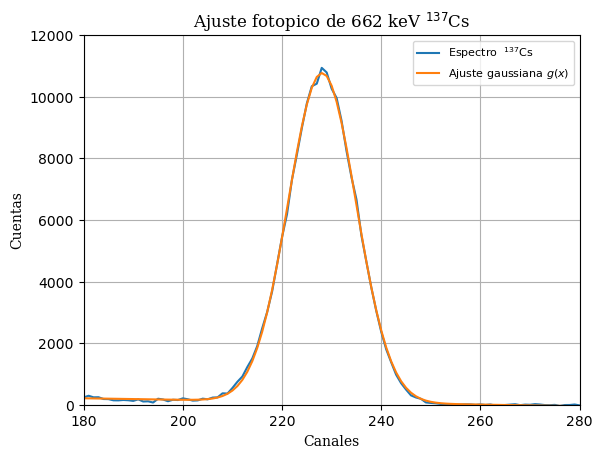

In [103]:
a,b=ajustar_gaussiana(Canales,1,180,280,Cs137y,10000,230,40/3,0,0.08)
fig,ax=plt.subplots()

ax.plot(Canales,Cs137y,label=r"Espectro  $^{137}$Cs")
ax.plot(gaussiana_experimental(Canales,*a),label=r"Ajuste gaussiana $g(x)$")

ax.set_xlim(180,280)
ax.set_ylim(0,12000)

ax.set_xlabel("Canales",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.set_title(r"Ajuste fotopico de 662 keV $^{137}$Cs",family="serif")
ax.grid()
ax.legend(fontsize=8)

plt.show()

Na22

M1=1408.86, mu1=179.49, sigma1=5.75, bo=26.40,b1=0.35
Errores=[10.24114561  0.04743029  0.05126083  3.67235351  0.12702849]


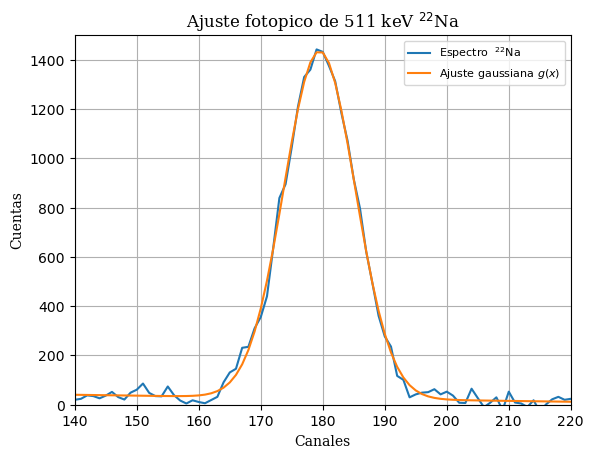

In [104]:
a,b=ajustar_gaussiana(Canales,1,140,220,Na22y,1400,176,30/3,0,0.08)
fig,ax=plt.subplots()

ax.plot(Canales,Na22y,label=r"Espectro  $^{22}$Na")
ax.plot(gaussiana_experimental(Canales,*a),label=r"Ajuste gaussiana $g(x)$")

ax.set_xlim(140,220)
ax.set_ylim(0,1500)

ax.set_xlabel("Canales",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.set_title(r"Ajuste fotopico de 511 keV $^{22}$Na",family="serif")
ax.grid()
ax.legend(fontsize=8)

plt.show()


M1=208.13, mu1=414.40, sigma1=9.61, bo=0.67,b1=-0.01
Errores=[3.60430828 0.18883611 0.20461006 1.3204402  0.0278976 ]


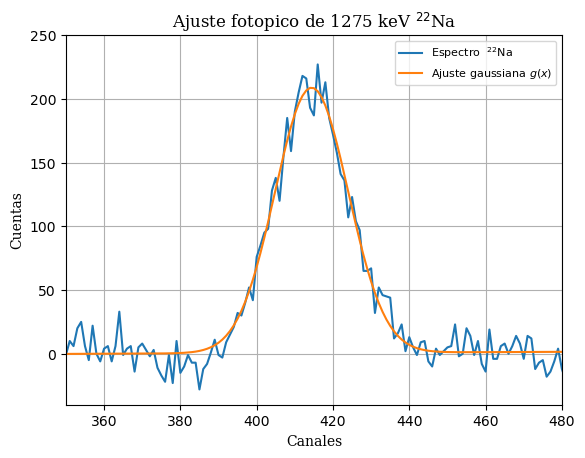

In [105]:
a,b=ajustar_gaussiana(Canales,1,350,480,Na22y,220,410,45/3,0,0.08)
fig,ax=plt.subplots()

ax.plot(Canales,Na22y,label=r"Espectro  $^{22}$Na")
ax.plot(gaussiana_experimental(Canales,*a),label=r"Ajuste gaussiana $g(x)$")

ax.set_xlim(350,480)
ax.set_ylim(-40,250)

ax.set_xlabel("Canales",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.set_title(r"Ajuste fotopico de 1275 keV $^{22}$Na",family="serif")
ax.grid()
ax.legend(fontsize=8)

plt.show()


M1=876.78, M2=4730.66, mu1=45.91, mu2=58.74, sigma1=4.31, sigma2=2.89, bo=90.18,b1=0.19
Errores=[3.46994582e+01 4.06432208e+01 2.03612674e-01 3.15823484e-02
 2.34620753e-01 3.33077333e-02 1.34826479e+01 5.80968545e-01]


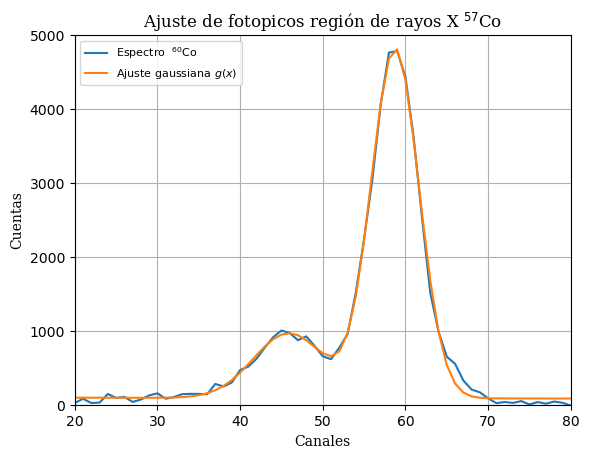

In [108]:
a,b=ajustar_gaussiana(Canales,2,20,80,Co57y,1000,45,10/3,10,0.08,4800,59,20/3)
fig,ax=plt.subplots()

ax.plot(Canales,Co57y,label=r"Espectro  $^{60}$Co")
ax.plot(gaussiana_doble(Canales,*a),label=r"Ajuste gaussiana $g(x)$")



ax.set_xlim(20,80)
ax.set_ylim(0,5000)


ax.set_xlabel("Canales",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.set_title(r"Ajuste de fotopicos región de rayos X $^{57}$Co",family="serif")
ax.grid()
ax.legend(fontsize=8)


plt.show()
